# Analysis for the X-Ray Spectra Experiment

In [3]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

## Summary of tasks

### Prior to working on this notebook

1. Obtain a copy of the AmpTek software **DppMCA** from the link on the course website.  Note: it works only on Windows or inside a Windows environment (Students with Macs have had success this way.)  Each member of the group should try to do this.

2. Download the data files with the .mca extension from the experiment page.  Start with the iron (Fe-26) data file.  Open the background (1500s) data file and then open the Fe-26 data file and compare them.  Note the large peaks above background for the iron sample.  Use the procedure described in class to set the ROI and obtain the peak position and width.  Record this data into a spreadsheet.

3. Repeat this process for all of the other known samples: find the peaks notably above background and obtain their positions and widths.  It is best to move up and down in <i>Z</i> from Fe, so that you can see how similar peaks shift as <i>Z</i> is changed.

4. Because of the large data set, the group should divide up the files, but make sure there are some that overlap, so you can check your technique by comparing results from different people.

5. Once you have analyzed the peaks from all of the "knowns" and have your procedure down, repeat for the 6 "unknowns." Pay close attention to what the peak pattern looks like, and how it might compare to similar peaks among the "knowns."

6. Finally, put the results into two .csv files, one for "knowns," one for "unknowns."  These will be read into the notebook.

### Tasks for this notebook

* Make a "Moseley plot" of the knowns: $\sqrt{\rm Ch\;\#}$ vs. $Z$.

* Determine the $\text{K}_\alpha$ series and the $\text{L}_\alpha$ series.  Fit lines to these to determine the screening constants $\sigma$.

* Make initial guesses for the $Z$ values of the unknowns, and plot the peaks for these samples in the Moseley plot.  Then adjust $Z$ if needed until the unknown peaks fit the pattern of the known peaks as well as can be seen.  This completes "Method 1" for the unknowns.

* Select the peaks corresponding to the $\text{K}_{\alpha1}$ series and look up the known energies of these peaks.  Then plot and fit $E_{\text{K}_{\alpha1}}$ versus $\text{Ch #}$, and obtain constants to create a calibration line that converts channel number to energy in eV or keV.

* Apply the calibration to the unknown peaks and look up the energies in the look-up table to match with the correct $Z$ values.  This completes "Method 2" for the unknowns.

## Read in the "Known" sample peak locations

In [98]:
#Load in data
knowns_data = pd.read_csv("Knowns.csv")

#Replace NaN's with 0's
knowns = knowns_data.fillna(0)
knowns

,Element,Z,Ka1,Ka1_FWHM,Ka2,Ka2_FWHM,Kb1,Kb1_FWHM,Kb2,Kb2_FWHM,La,La_FWHM,Lb,Lb_FWHM,Lg,Lg_FWHM,Duration(s)
0,Cl,17.0,69.01,5.0415,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,153.88
1,Ti,22.0,118.50,4.6966,0.00,0.0000,130.01,4.8500,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,152.95
2,Cr,24.0,142.82,4.8480,0.00,0.0000,157.13,4.6513,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,152.40
3,Fe,26.0,169.30,4.9828,0.00,0.0000,187.07,3.9826,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,150.69
4,Ni,28.0,198.17,5.0323,0.00,0.0000,219.44,5.2907,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,157.87
5,Cu,29.0,213.46,5.2364,0.00,0.0000,236.47,5.1020,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,153.89
6,Zn,30.0,229.37,5.4145,0.00,0.0000,254.77,5.5649,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,174.95
7,Ag,47.0,591.78,9.3512,0.00,0.0000,667.76,6.5355,0.00,0.0000,79.66,3.9616,0.00,0.0000,0.00,0.0000,157.37
8,Cd,48.0,618.78,9.6401,0.00,0.0000,698.94,7.6527,714.50,0.0000,83.70,4.1330,0.00,0.0000,0.00,0.0000,152.22
9,Sn,50.0,674.87,11.4259,0.00,0.0000,762.68,8.5220,780.07,4.1063,93.22,4.1667,0.00,0.0000,0.00,0.0000,153.10


### Combine peak locations and widths into uncertainty-object arrays

In [17]:
#Make uncertainty arrays
unc_arrays = {}

#Use for loop to combine the uncertainties with the data
for i in np.arange(0,7):
    mask = knowns[knowns.columns[2*i + 2]] != 0
    data = knowns[knowns.columns[2*i + 2]].values[mask]
    uncs = knowns[knowns.columns[2*i + 3]].values[mask] * 0.5
    unc_arrays[knowns.columns[2*i + 2]] = up.uarray(data, uncs)

unc_arrays['Ka1']

array([69.01+/-2.52075, 118.5+/-2.3483, 142.82+/-2.424, 169.3+/-2.4914,
       198.17+/-2.51615, 213.46+/-2.6182, 229.37+/-2.70725,
       591.78+/-4.6756, 618.78+/-4.82005, 674.87+/-5.71295,
       1154.34+/-4.0609, 1545.14+/-5.5022, 1848.87+/-2.575,
       2014.29+/-5.2796, 213.35+/-2.4487, 229.33+/-2.2927], dtype=object)

## Make a Moseley Plot

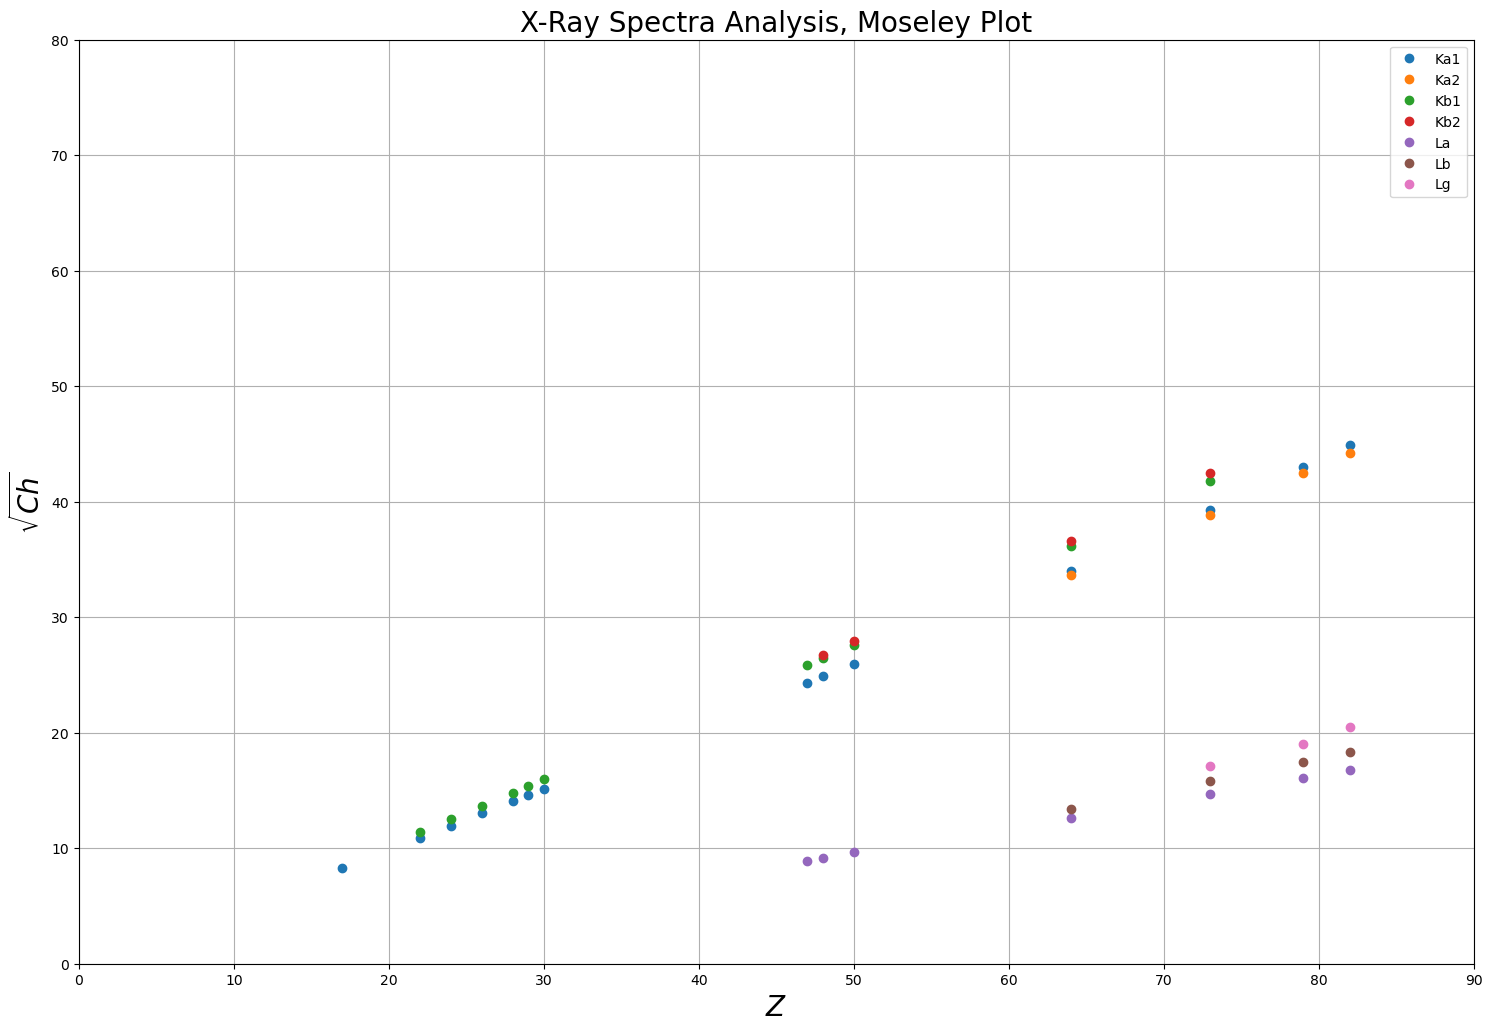

In [19]:
plt.figure(figsize=(18,12))
plt.grid()
plt.title('X-Ray Spectra Analysis, Moseley Plot',fontsize=20)
plt.ylabel(r'$\sqrt{Ch}$',fontsize=20)
plt.xlabel(r'$Z$',fontsize=20)
plt.xlim(0,90)
plt.ylim(0,80)

## You do the rest

for i in np.arange(0,7):
    plt.plot(knowns_data['Z'], np.sqrt(up.nominal_values(knowns_data[knowns_data.columns[2*i + 2]])), 'o', label = knowns_data.columns[2*i + 2])

plt.legend()

## Fit to obtain screening constants

Fit the $K_{\alpha1}$ and $L_{\alpha}$ series to a line to obtain the screening constants $\sigma_K$ and $\sigma_L$.

In [22]:
#Empty array for the fits
fits = {}

for i in np.arange(0,7):
    #Masks the NaNs in the data
    mask = ~np.isnan(up.nominal_values(knowns_data[knowns_data.columns[2*i + 2]])) & ~np.isnan(knowns_data['Z'])
    fits[knowns_data.columns[2*i + 2]] = stats.linregress(knowns_data['Z'][mask], 
                                                     np.sqrt(up.nominal_values(knowns_data[knowns_data.columns[2*i + 2]]))[mask])

#The x-intercepts for the K and L lines
sigma_K = unc.ufloat(-fits['Ka1'].intercept, fits['Ka1'].intercept_stderr)  / unc.ufloat(fits['Ka1'].slope, fits['Ka1'].stderr)
sigma_L = unc.ufloat(-fits['La'].intercept, fits['La'].intercept_stderr)  / unc.ufloat(fits['La'].slope, fits['La'].stderr)

### Results of fit

In [23]:
print('Screening constant for K-alpha1 = {:.2uP}'.format(sigma_K))
print('Screening constant for L-alpha = {:.2uP}'.format(sigma_L))

Screening constant for K-alpha1 = 2.94±0.34
Screening constant for L-alpha = 6.96±0.54


## Replot with fitlines

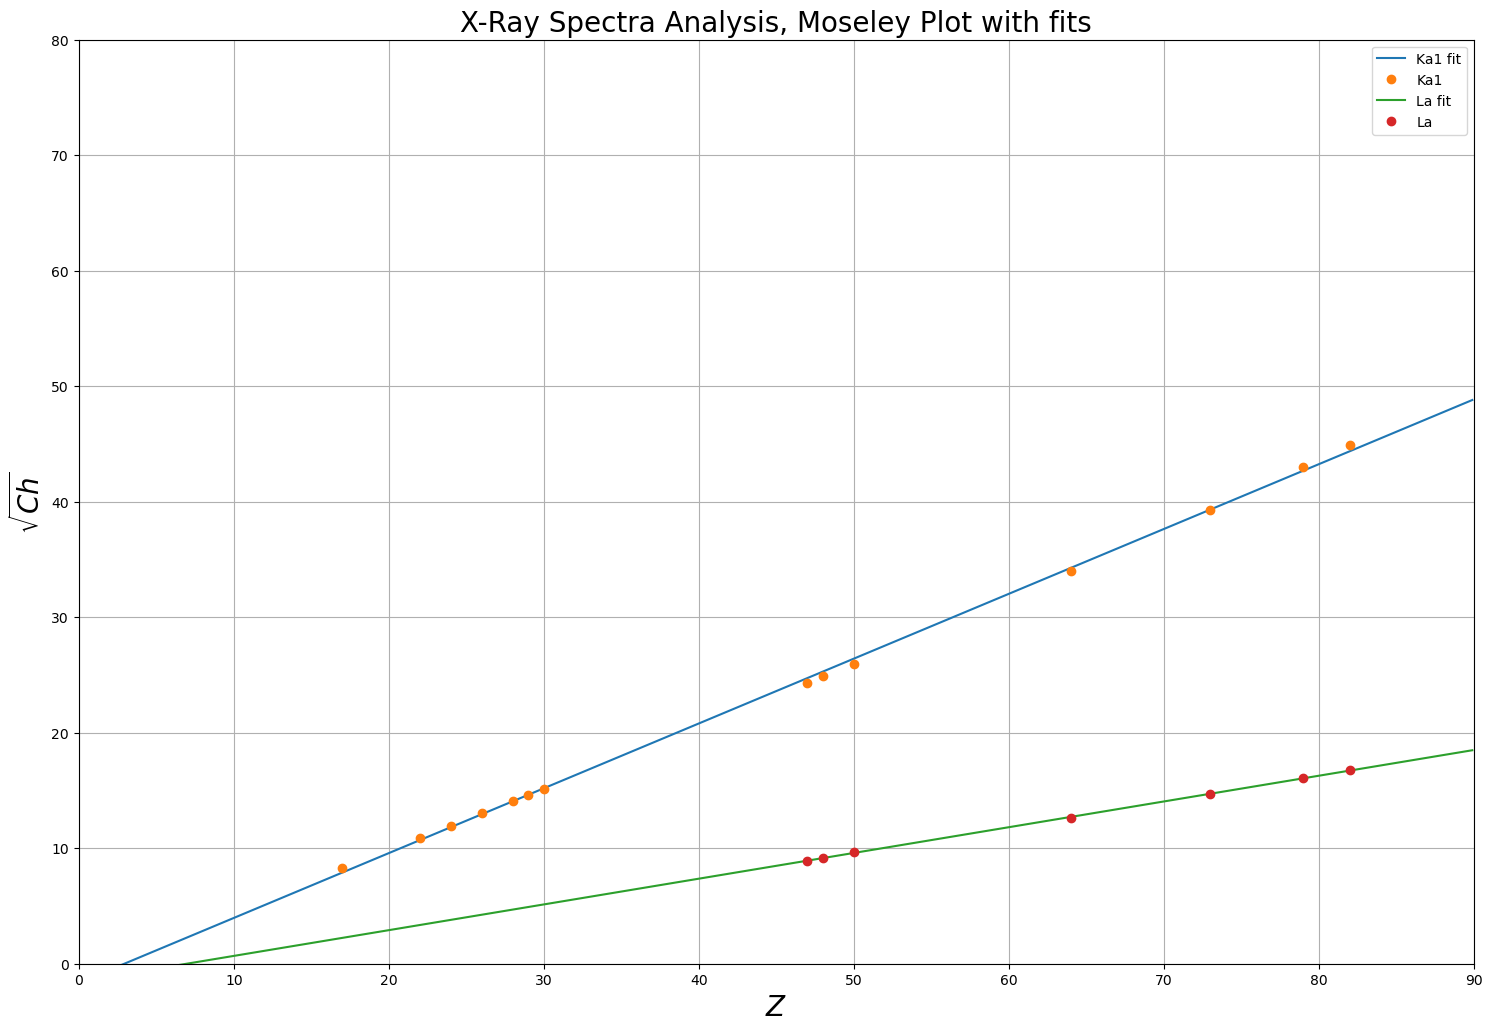

In [35]:
#Plot settings like before
plt.figure(figsize=(18,12))
plt.grid()
plt.title('X-Ray Spectra Analysis, Moseley Plot with fits',fontsize=20)
plt.ylabel(r'$\sqrt{Ch}$',fontsize=20)
plt.xlabel(r'$Z$',fontsize=20)
plt.xlim(0,90)
plt.ylim(0,80)

xvalues = np.arange(0, 90, 0.1)

#Use for loop to plot the data
for i in [0,4]:
    plt.plot(xvalues, xvalues * fits[knowns_data.columns[2*i + 2]].slope + fits[knowns_data.columns[2*i + 2]].intercept,
             '-', label = knowns_data.columns[2*i + 2]+ ' fit')
    plt.plot(knowns_data['Z'], np.sqrt(up.nominal_values(knowns_data[knowns_data.columns[2*i + 2]])),
             'o', label = knowns_data.columns[2*i + 2])

plt.legend()

## Read in the "Unknown" peaks

In [88]:
#Load unknown sample data
unknowns_data = pd.read_csv("Unknowns.csv")

#Replacing NaN's with 0's
unknowns = unknowns_data.fillna(0)
unknowns

,Property,U1,U2,U3,U4,U5,U6
0,Ka1,142.8100,198.2200,262.9000,466.6500,646.4800,1556.9800
1,Ka1_FWHM,4.7439,4.9528,5.5444,7.2832,10.7143,8.3184
2,Kb1,156.8000,219.6200,292.7400,526.0600,730.8800,1593.5400
3,Kb1_FWHM,3.7964,5.6922,5.8168,6.5419,6.4706,12.0354
4,Kb2,0.0000,0.0000,0.0000,0.0000,746.9400,0.0000
5,Kb2_FWHM,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,La,0.0000,0.0000,0.0000,367.3800,89.4300,223.3800
7,La_FWHM,0.0000,0.0000,0.0000,9.2708,6.0935,5.6117
8,Lb,0.0000,0.0000,0.0000,0.0000,0.0000,259.0700
9,Lb_FWHM,0.0000,0.0000,0.0000,0.0000,0.0000,7.2465


In [91]:
#Combine uncertainties with data
unk_unc_array = {}

#Use for loop to do so
for i in np.arange(0, 6):
    #Use a mask to look for nonzero values and then the data along with uncertainties
    mask = unknowns.iloc[np.arange(0, 8, 2), [i+1]] != 0
    data = unknowns.iloc[np.arange(0, 8, 2), [i+1]].values[mask]
    unk_uncs = unknowns.iloc[np.arange(1, 9, 2), [i+1]].values[mask] * 0.5
    unk_unc_array[unknowns.columns[i + 1]] = up.uarray(data, unk_uncs)

unk_unc_array

{'U1': array([142.81+/-2.37195, 156.8+/-1.8982], dtype=object),
 'U2': array([198.22+/-2.4764, 219.62+/-2.8461], dtype=object),
 'U3': array([262.9+/-2.7722, 292.74+/-2.9084], dtype=object),
 'U4': array([466.65+/-3.6416, 526.06+/-3.27095, 367.38+/-4.6354], dtype=object),
 'U5': array([646.48+/-5.35715, 730.88+/-3.2353, 746.94+/-0, 89.43+/-3.04675],
       dtype=object),
 'U6': array([1556.98+/-4.1592, 1593.54+/-6.0177, 223.38+/-2.80585], dtype=object)}

## Plot the Unknowns with the Knowns

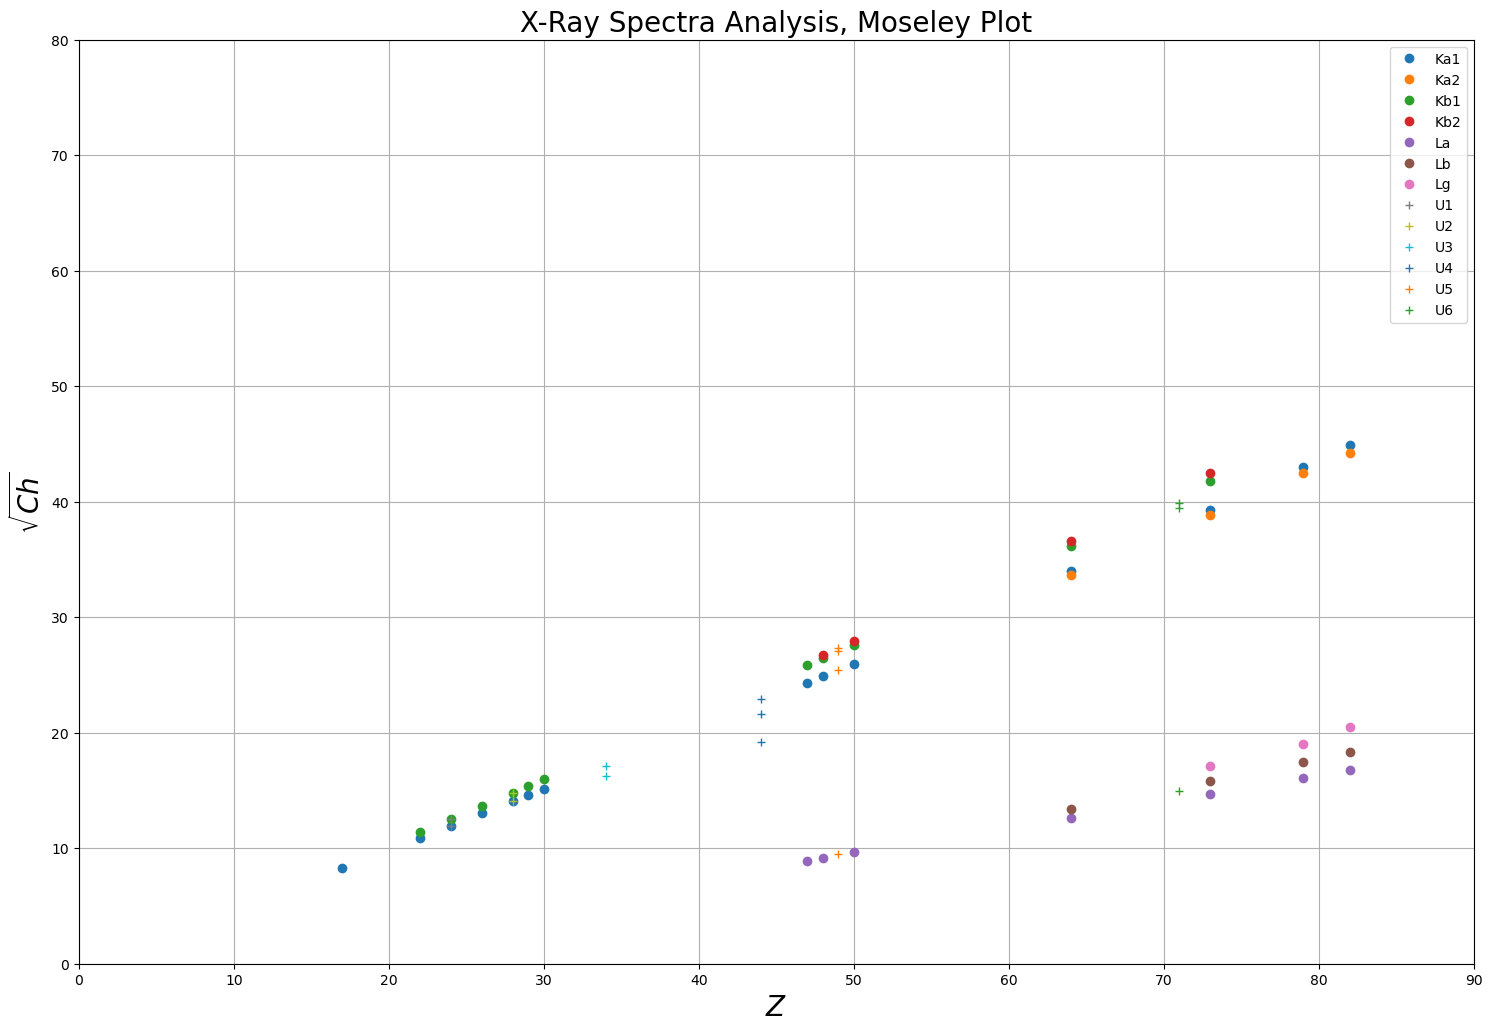

In [95]:
plt.figure(figsize=(18,12))
plt.grid()
plt.title('X-Ray Spectra Analysis, Moseley Plot',fontsize=20)
plt.ylabel(r'$\sqrt{Ch}$',fontsize=20)
plt.xlabel(r'$Z$',fontsize=20)
plt.xlim(0,90)
plt.ylim(0,80)

#Using for loop to plot
for i in np.arange(0,7):
    plt.plot(knowns_data['Z'], np.sqrt(up.nominal_values(knowns_data[knowns_data.columns[2*i + 2]])),
             'o', label = knowns_data.columns[2*i + 2])

#Using Z estimates from the data
Z_est = [24, 28, 34, 44, 49, 71]

for i in np.arange(0, 6):
    xvalues = np.zeros(len(unk_unc_array['U' + str(i+1)])) + Z_est[i]
    #Using a '+' to identify the unknowns on the plot
    plt.plot(xvalues, np.sqrt(up.nominal_values(unk_unc_array['U'+ str(i+1)])),
             '+', label = 'U' + str(i+1))

plt.legend()

## Include the known energies

Look up the known energies of the known $K_{\alpha1}$ (and $L_{\alpha}$) peaks (in keV) and add a column to the known's dataframe.  This will make it easy to fit.

In [99]:
#Columns of Ka1 and La peaks in keV
Ka1_keV = [2.62, 4.51, 5.41, 6.40, 7.48, 8.05, 8.64, 22.16,
           23.17, 25.27,42.98, 57.52, 68.79, 74.96, 0, 0]

La_keV = [0, 0.45, 0.57, 0.70, 0.85, 0.93, 1.01, 2.98, 3.13,
          3.44, 6.06, 8.15, 9.71, 10.55, 0, 0]

#Place columns into the dataframe
knowns_full = knowns
knowns_full.insert(3, 'Ka1_keV', Ka1_keV)
knowns_full.insert(12, 'La_keV', La_keV)


In [100]:
print('Collected Known data. Energy column in keV.')
# Print your dataframe with the energies
knowns_full

Collected Known data. Energy column in keV.


,Element,Z,Ka1,Ka1_keV,Ka1_FWHM,Ka2,Ka2_FWHM,Kb1,Kb1_FWHM,Kb2,Kb2_FWHM,La,La_keV,La_FWHM,Lb,Lb_FWHM,Lg,Lg_FWHM,Duration(s)
0,Cl,17.0,69.01,2.62,5.0415,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.00,0.0000,0.00,0.0000,0.00,0.0000,153.88
1,Ti,22.0,118.50,4.51,4.6966,0.00,0.0000,130.01,4.8500,0.00,0.0000,0.00,0.45,0.0000,0.00,0.0000,0.00,0.0000,152.95
2,Cr,24.0,142.82,5.41,4.8480,0.00,0.0000,157.13,4.6513,0.00,0.0000,0.00,0.57,0.0000,0.00,0.0000,0.00,0.0000,152.40
3,Fe,26.0,169.30,6.40,4.9828,0.00,0.0000,187.07,3.9826,0.00,0.0000,0.00,0.70,0.0000,0.00,0.0000,0.00,0.0000,150.69
4,Ni,28.0,198.17,7.48,5.0323,0.00,0.0000,219.44,5.2907,0.00,0.0000,0.00,0.85,0.0000,0.00,0.0000,0.00,0.0000,157.87
5,Cu,29.0,213.46,8.05,5.2364,0.00,0.0000,236.47,5.1020,0.00,0.0000,0.00,0.93,0.0000,0.00,0.0000,0.00,0.0000,153.89
6,Zn,30.0,229.37,8.64,5.4145,0.00,0.0000,254.77,5.5649,0.00,0.0000,0.00,1.01,0.0000,0.00,0.0000,0.00,0.0000,174.95
7,Ag,47.0,591.78,22.16,9.3512,0.00,0.0000,667.76,6.5355,0.00,0.0000,79.66,2.98,3.9616,0.00,0.0000,0.00,0.0000,157.37
8,Cd,48.0,618.78,23.17,9.6401,0.00,0.0000,698.94,7.6527,714.50,0.0000,83.70,3.13,4.1330,0.00,0.0000,0.00,0.0000,152.22
9,Sn,50.0,674.87,25.27,11.4259,0.00,0.0000,762.68,8.5220,780.07,4.1063,93.22,3.44,4.1667,0.00,0.0000,0.00,0.0000,153.10


## Fit a line

Fit a line to the known energy vs. measured peak locations.  IMPORTANT: This is NOT a Moseley plot, just the un-transformed peak measurements.

In [104]:
#Empty arrays for the energy and locations
energy_values = []
loc_values = []

#Use masks to look at where the values are nonzero
mask_Ka1 = (knowns_full['Ka1'] != 0) & (knowns_full['Ka1_keV'] != 0)
mask_La = (knowns_full['La'] != 0) & (knowns_full['La_keV'] != 0)

#Add the values to lists
energy_values.append(list(knowns_full['Ka1_keV'][mask_Ka1]))
energy_values.append(list(knowns_full['La_keV'][mask_La]))

loc_values.append(list(knowns_full['Ka1'][mask_Ka1]))
loc_values.append(list(knowns_full['La'][mask_La]))

# flatten lists
energy_values = np.concatenate(energy_values).tolist()
loc_values = np.concatenate(loc_values).tolist()


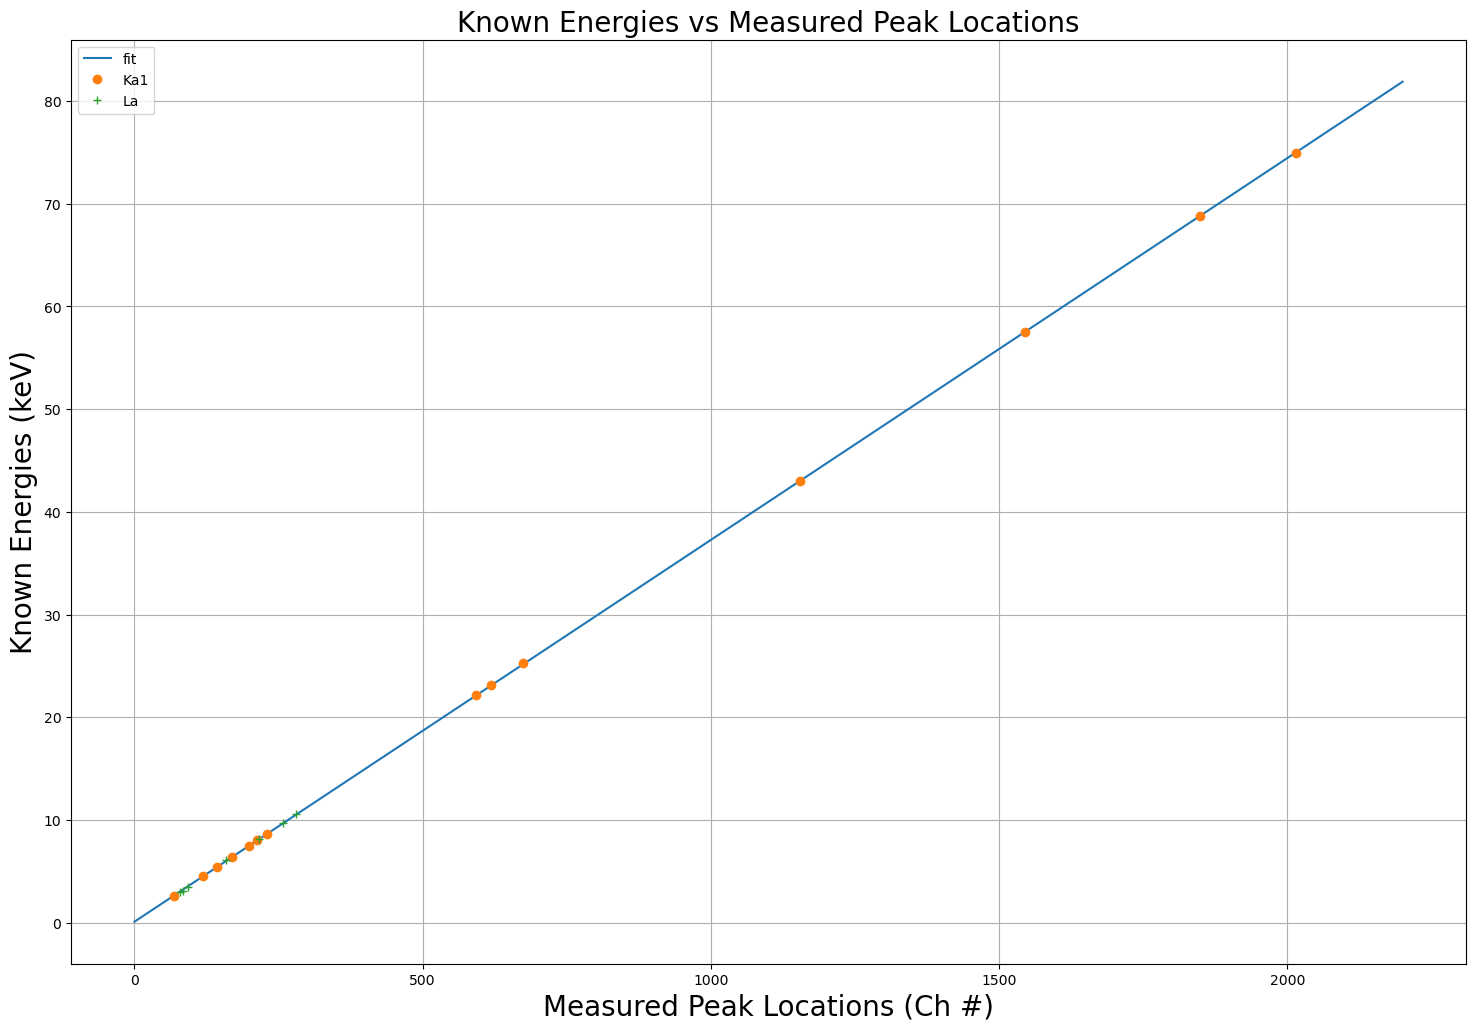

In [109]:
#Create and plot fit

calib_fit = stats.linregress(loc_values, energy_values)

#Plot the fit along with data
plt.figure(figsize=(18,12))
plt.title('Known Energies vs Measured Peak Locations', fontsize = 20)
plt.ylabel(r'Known Energies (keV)', fontsize = 20)
plt.xlabel(r'Measured Peak Locations (Ch #)', fontsize = 20)
plt.grid()

#Plotting the fit
xvalues = np.arange(0, 2200, 0.1)
plt.plot(xvalues,
         xvalues * calib_fit.slope + calib_fit.intercept, label = 'fit')

#Separate the K and L lines
plt.plot(list(knowns_full['Ka1'][mask_Ka1]),
         list(knowns_full['Ka1_keV'][mask_Ka1]), 'o', label = 'Ka1')

plt.plot(list(knowns_full['La'][mask_La]),
         list(knowns_full['La_keV'][mask_La]),'+', label = 'La')
plt.legend()


## Make calibration function

Use the fit results to create a simple function to transform peak locations into energies in keV.

In [110]:
#Defining a function

def calibrate_energy(peak_loc):
    energy = peak_loc * calib_fit.slope + calib_fit.intercept
    return energy

Test it against the known $K_{\alpha1}$ and $L_{\alpha}$ lines.  Easiest way: make a table wth adjacent columns.

In [112]:
#Mask the unmeasured points
mask_Ka1calib = knowns_full['Ka1'] != 0
mask_Lacalib = knowns_full['La'] != 0

#Use the calibration function
Ka1_test = calibrate_energy(knowns_full['Ka1']) * mask_Ka1calib
La_test = calibrate_energy(knowns_full['La']) * mask_Lacalib

#Insert the data just afer the measured peaks from the software
knowns_full.insert(4, 'Ka1_calib', Ka1_test)
knowns_full.insert(14, 'La_calib', La_test)

knowns_full

,Element,Z,Ka1,Ka1_keV,Ka1_calib,Ka1_FWHM,Ka2,Ka2_FWHM,Kb1,Kb1_FWHM,...,Kb2_FWHM,La,La_keV,La_calib,La_FWHM,Lb,Lb_FWHM,Lg,Lg_FWHM,Duration(s)
0,Cl,17.0,69.01,2.62,2.660999,5.0415,0.00,0.0000,0.00,0.0000,...,0.0000,0.00,0.00,0.000000,0.0000,0.00,0.0000,0.00,0.0000,153.88
1,Ti,22.0,118.50,4.51,4.500741,4.6966,0.00,0.0000,130.01,4.8500,...,0.0000,0.00,0.45,0.000000,0.0000,0.00,0.0000,0.00,0.0000,152.95
2,Cr,24.0,142.82,5.41,5.404813,4.8480,0.00,0.0000,157.13,4.6513,...,0.0000,0.00,0.57,0.000000,0.0000,0.00,0.0000,0.00,0.0000,152.40
3,Fe,26.0,169.30,6.40,6.389181,4.9828,0.00,0.0000,187.07,3.9826,...,0.0000,0.00,0.70,0.000000,0.0000,0.00,0.0000,0.00,0.0000,150.69
4,Ni,28.0,198.17,7.48,7.462395,5.0323,0.00,0.0000,219.44,5.2907,...,0.0000,0.00,0.85,0.000000,0.0000,0.00,0.0000,0.00,0.0000,157.87
5,Cu,29.0,213.46,8.05,8.030786,5.2364,0.00,0.0000,236.47,5.1020,...,0.0000,0.00,0.93,0.000000,0.0000,0.00,0.0000,0.00,0.0000,153.89
6,Zn,30.0,229.37,8.64,8.622224,5.4145,0.00,0.0000,254.77,5.5649,...,0.0000,0.00,1.01,0.000000,0.0000,0.00,0.0000,0.00,0.0000,174.95
7,Ag,47.0,591.78,22.16,22.094460,9.3512,0.00,0.0000,667.76,6.5355,...,0.0000,79.66,2.98,3.056902,3.9616,0.00,0.0000,0.00,0.0000,157.37
8,Cd,48.0,618.78,23.17,23.098158,9.6401,0.00,0.0000,698.94,7.6527,...,0.0000,83.70,3.13,3.207085,4.1330,0.00,0.0000,0.00,0.0000,152.22
9,Sn,50.0,674.87,25.27,25.183249,11.4259,0.00,0.0000,762.68,8.5220,...,4.1063,93.22,3.44,3.560982,4.1667,0.00,0.0000,0.00,0.0000,153.10


## Apply to Unknowns

In [119]:
#Create a new dataframe withi just the peaks of the unknowns

unknown_calib = unknowns
#Drops the FWHM rows and the Z estimate
unknown_calib = unknown_calib.drop(index = np.arange(1,11,2), axis = 0)
unknown_calib = unknown_calib.drop(index = 10, axis = 0)
unknown_calib = unknown_calib.drop(index = 11, axis = 0)
unknown_calib

,Property,U1,U2,U3,U4,U5,U6
0,Ka1,142.81,198.22,262.90,466.65,646.48,1556.98
2,Kb1,156.80,219.62,292.74,526.06,730.88,1593.54
4,Kb2,0.00,0.00,0.00,0.00,746.94,0.00
6,La,0.00,0.00,0.00,367.38,89.43,223.38
8,Lb,0.00,0.00,0.00,0.00,0.00,259.07


In [120]:
# Use the calibration function on the unknowns
for i in np.arange(0, 6):
    mask_unk = unknown_calib['U'+str(i+1)] != 0
    unknown_energy = calibrate_energy(unknown_calib['U'+str(i+1)]) * mask_unk
    unknown_calib.insert(2 * i + 2, 'U' + str(i+1) + '_keV', unknown_energy)
    
unknown_calib

,Property,U1,U1_keV,U2,U2_keV,U3,U3_keV,U4,U4_keV,U5,U5_keV,U6,U6_keV
0,Ka1,142.81,5.404442,198.22,7.464254,262.90,9.868669,466.65,17.442875,646.48,24.127879,1556.98,57.974821
2,Kb1,156.80,5.924506,219.62,8.259778,292.74,10.977942,526.06,19.651384,730.88,27.265366,1593.54,59.333903
4,Kb2,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,746.94,27.862380,0.00,0.000000
6,La,0.00,0.000000,0.00,0.000000,0.00,0.000000,367.38,13.752611,89.43,3.420093,223.38,8.399552
8,Lb,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,259.07,9.726293


In [123]:
# Using the lookup table, we can make a list of the Z values
unknown_Z = [24, 28, 32, 42, 49, 74]
print('Using the lookup table, the function found the energies of the following Z numbers:')
print(unknown_Z)


Using the lookup table, the function found the energies of the following Z numbers:
[24, 28, 32, 42, 49, 74]
